In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import numpy as np
%pylab
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: <object object at 0x7ad8986ab560>
Populating the interactive namespace from numpy and matplotlib


#Importing dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 4/advertising.csv')

In [4]:
#Data cleaning
dataset.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
dataset.shape

(200, 4)

In [7]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
pd.isnull(dataset).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

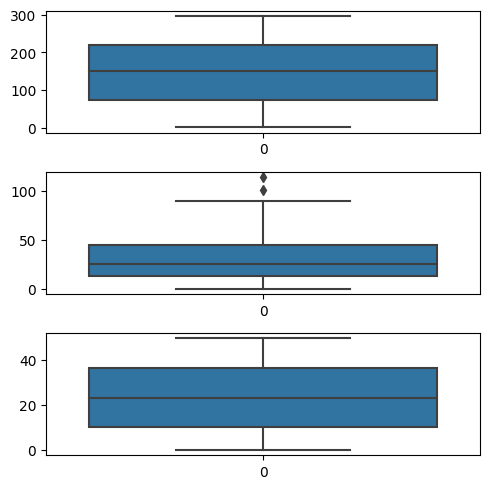

In [9]:
fig, axs = plt.subplots(3, figsize=(5, 5))
sns.boxplot(data=dataset['TV'], ax=axs[0])
sns.boxplot(data=dataset['Newspaper'], ax=axs[1])
sns.boxplot(data=dataset['Radio'], ax=axs[2])
plt.tight_layout()

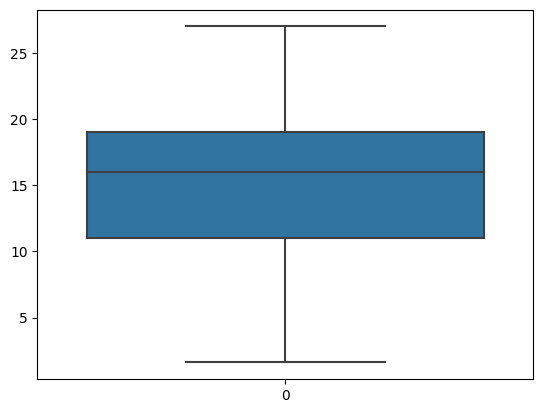

In [10]:
sns.boxplot(data=dataset['Sales'])
plt.show()

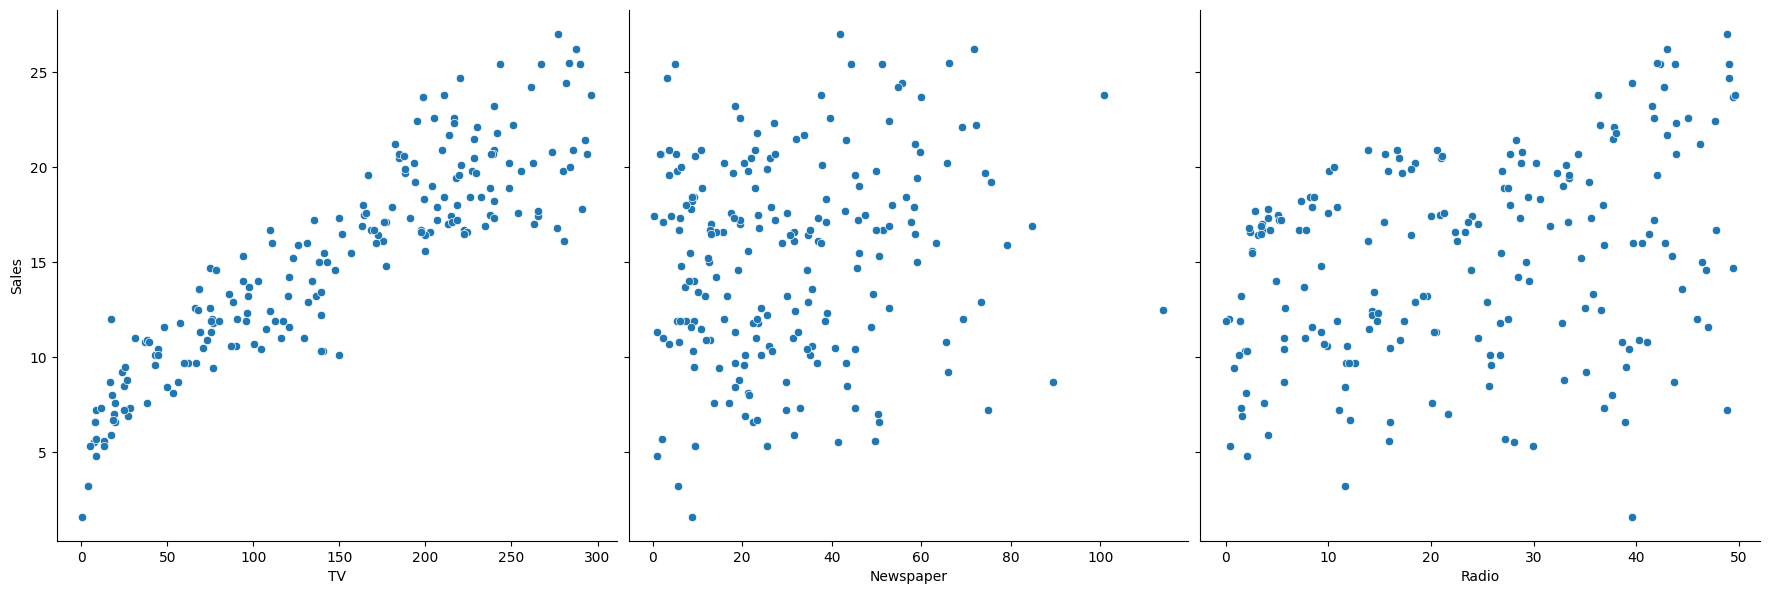

In [11]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=6, aspect=1, kind='scatter')

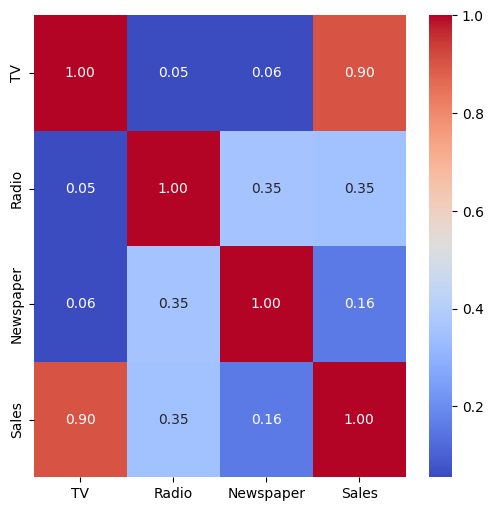

In [12]:
#Correlation
plt.figure(figsize=(6,6))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot= True, fmt='.2f')
plt.show()

As it is visible from the heatmap the variable TV is the most correlated with sales

#Splitting Dataset

In [13]:
X = dataset['TV']
Y = dataset['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [15]:
X_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [16]:
Y_train.head()

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

#Training data

In [17]:
X_train = X_train.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

In [18]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)


LinearRegression()

#Model performance

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lr = model_lr.predict(X_test)

In [20]:
print('coefficients:', model_lr.coef_)
print('intercept:', model_lr.intercept_)
print('Mean Squared Error:%.2f'
       % mean_squared_error(Y_test, y_pred_lr))
print('coefficients of determination(R^2):%.2f'
       % r2_score(Y_test, y_pred_lr))



coefficients: [[0.05410548]]
intercept: [6.99553291]
Mean Squared Error:5.35
coefficients of determination(R^2):0.73
